<a href="https://colab.research.google.com/github/ljs7463/CSAI_assignment/blob/main/n211a_simple_regression_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 1*

# 📝 Assignment
---

In [ ]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1)

In [ ]:
# target인 price와의 상관관계 확인
pd.DataFrame(abs(df.corr()['price']).sort_values(ascending = False))
# sqft_living이 상관관계가 가장 높다.

,price
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525138
view,0.397293
sqft_basement,0.323816
bedrooms,0.308350
lat,0.307003


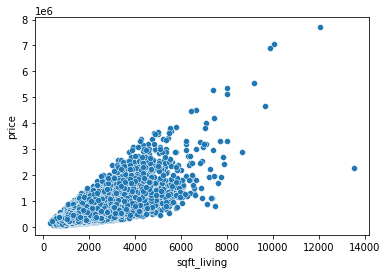

In [ ]:
# price와 상관관계가 가장 높은 'sqft_living'의 시각화
sns.scatterplot(x = 'sqft_living', y = 'price', data = df)

### 2) 

기준 모델의 값은 : 540088.1417665294 입니다.


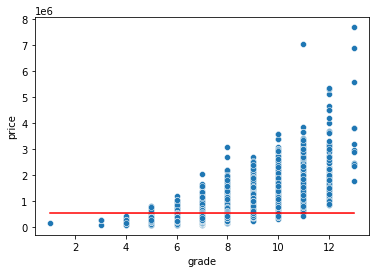

In [ ]:
# 기준모델
predict = df['price'].mean()
print("기준 모델의 값은 :",predict,"입니다.")
# 시각화 
sns.scatterplot(x = 'grade', y = 'price', data = df)
sns.lineplot(x = 'grade', y = predict, data= df, color = 'r')


### 3)

In [ ]:
# 선형회귀 모델 만들기

# 라이브러리 불러오기
from sklearn.linear_model import LinearRegression

# 예측모델 인스턴스 생성
model = LinearRegression()

# feature와 target지정 및 train, test셋 생성
feature = ['grade']
target = ['price']
X_train = df[feature]
y_train = df[target]

# 모델을 학습(fit)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X_test = [[6]]
y_pred = model.predict(X_test)
print("grade가 6일때 예측되는 주택의 가격은 :", y_pred, "입니다.")

grade가 6일때 예측되는 주택의 가격은 : [[194700.3977405]] 입니다.


### 4) 

In [ ]:
# 새로운 데이터예측

# 예측을 위한 함수 생성
def predict(grade):
  y_pred = model.predict([[grade]])
  result = print('grade',grade,"에 대해 예측되는 주택가격은 :", y_pred,'입니다.') 

predict(8)

grade 8 에 대해 예측되는 주택가격은 : [[611615.52265726]] 입니다.


In [ ]:
# 회귀계수
print('회귀계수는:',model.coef_,'입니다')

회귀계수는: [[208457.56245838]] 입니다


### 5)

In [ ]:
model2 = LinearRegression()

# feature2와 target지정 및 train, test셋 생성
feature = ['sqft_living']
target = ['price']
X_train2 = df[feature]
y_train2 = df[target]

# 모델을 학습(fit)
model2.fit(X_train2, y_train2)

# 모델 사용하기
X_test2 = [[1000]]
y_pred2 = model2.predict(X_test2)
print("sqft_living이", X_test2,"일때 예상 가격은",y_pred2,'입니다.')

sqft_living이 [[1000]] 일때 예상 가격은 [[237042.82480297]] 입니다.


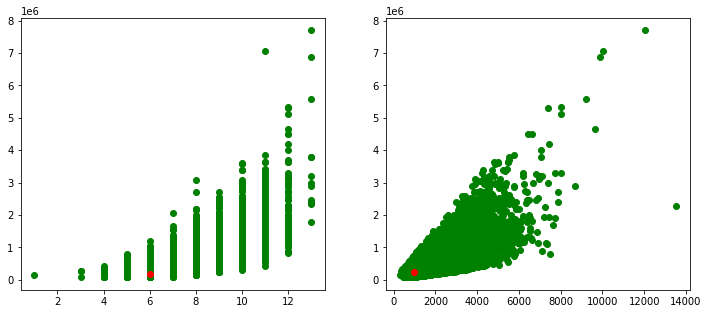

In [ ]:
# grade(좌) 와 sqft_living(우)의 모델 시각화 비교
fig, ax = plt.subplots(1,2,figsize = (12,5))

ax[0].scatter(X_train, y_train, color='green', linewidth=1)
ax[0].scatter(X_test, y_pred, color='r', linewidth=1);
ax[1].scatter(X_train2, y_train2, color='green', linewidth=1)
ax[1].scatter(X_test2, y_pred2, color='r', linewidth=1);

In [ ]:
# 예측을 위한 함수 생성
def predict2(sqft_living):
  y_pred2 = model2.predict([[sqft_living]])
  result = print('sqft_living가',sqft_living,"일때 예측되는 주택가격은 :", y_pred2,'입니다.') 

predict2(1000)

sqft_living가 1000 일때 예측되는 주택가격은 : [[237042.82480297]] 입니다.


In [ ]:
# 상관계수 구하기
print("상관계수는:",model2.coef_,"입니다")

상관계수는: [[280.6235679]] 입니다


In [ ]:
# 절편
model2.intercept_

array([-43580.74309447])

 6)단순선형회귀모델을 만들기 위한 좋은 특성을 선택하기 위해 고려해야 하는 사항들에 대해 조사하고 서술하세요.

 단순선형회귀모델을 위해 고려해야할점으로는 선형적인가,  등분산성, 정규성 이렇게 있습니다. 
 
 * 먼저 선형성은 선형회귀분석에서 가장 중요한 기본가정으로서 당연히 선형한 모델이어야한다. 여기서 선형성이란 종속변수y와 독립변수X간에 선형성을 만족하는 특성을 의미한다.
 * 등분산성이란 분산이 같다는 것이고, 분산이 같다는 것은 특정한 패턴 없이 고르게 분포했다는 의미이다. 여기서 등분산성의 주체는 잔차를 말한다.
 * 정규성 정규성은 잔차가 정규성을 만족하는지의 여루보서 정규분포를 띄는지의 여부를 의미한다.
 
 위의 고려사항들을 만족해야 유의한 단순선형회귀모델이 나온다. 방법으로는 위의 위배시키는 변수를 제거하는것이 도움이 된다.


 7)OLS에 대해서 검색해 보고 본인의 이해를 녹여내어 10문장 내로 요약해 보세요.

 잔차제곱의합을 최소화하는 방법을 OLS라고 부른다. 먼저 여기서 잔차란 예측값과 관측값의 차이이며 회귀선은 잔차 제곱들의 합인 RSS를 최소화 하는 직선을 말한다. 이때 이값이(RSS) 회귀모델 함수의 비용함수(cost function)이라고 하는데 이때 이 잔차제곱의 함을 최소화하는 방법을 바로 OLS라고 한다.

 요약하면 잔차제곱합(RSS)를 최소화하는 가중치 벡터를 구하는 방법을 최소자승법 즉, OLS(Ordinary Least Squares)라고 한다.